In [327]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [328]:
df_data=pd.read_csv('data.csv')
df_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [329]:
df_data.shape

(4600, 18)

In [330]:
df_data.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [331]:
missing=df_data.isnull().sum()
missing

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [332]:
df_remove=['date','yr_renovated','city','statezip','country','street']
df_data=df_data.drop(df_remove,axis=1)
df_data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938
6,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976
7,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989
8,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985
9,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945


In [333]:
df_corr=df_data.corr()

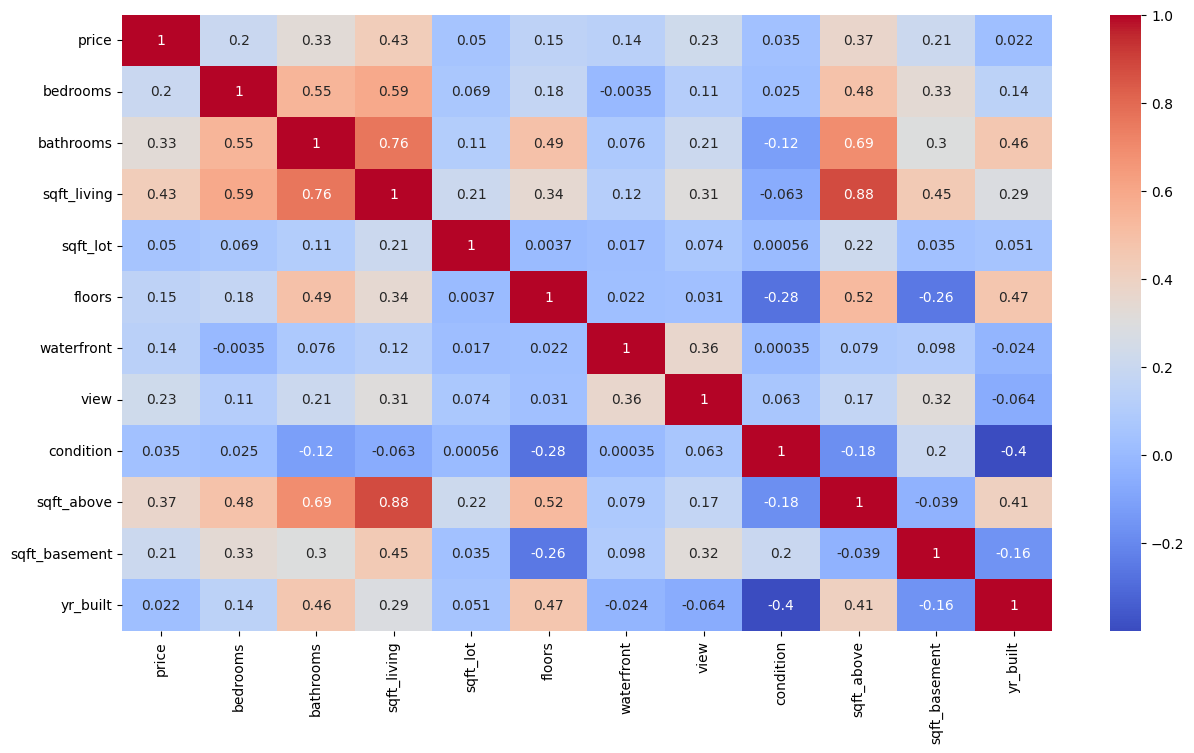

In [334]:
plt.figure(figsize=(15,8))
sns.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.show()

In [335]:
import scipy.stats as stats
z_score=stats.zscore(df_data)
threshold=3
print("size befor:",df_data.shape)
outleirs_data=df_data[(z_score>threshold).any(axis=1)]
df_data=df_data[(z_score<=threshold).all(axis=1)]
print("size after:",df_data.shape)



size befor: (4600, 12)
size after: (4244, 12)


In [336]:
outleirs_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921
56,491500.0,4.0,1.75,2190,125452,1.0,0,2,3,2190,0,1968
100,736500.0,4.0,2.50,3180,21904,2.0,0,3,3,3180,0,2000
107,1090000.0,4.0,2.50,4340,141570,2.5,0,0,3,4340,0,1992
118,1030000.0,5.0,2.75,3190,16920,1.0,0,3,3,1690,1500,1976


In [337]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(df_data)
df_scalar=pd.DataFrame(scalar.transform(df_data),columns=df_data.columns)


In [338]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [339]:
x=df_data.drop('price',axis=1)
y=df_data['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [340]:
models=[
    ('regression',RandomForestRegressor()),
    ('LinearRegression:',LinearRegression()),
    ('descision tree:',DecisionTreeRegressor()),
    ('Knn:',KNeighborsRegressor())
]

In [341]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [342]:
for name ,model in models:
    print(name)
    print()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print('mean_square_error:',mean_squared_error(y_test,y_pred))
    print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))
    print('r2 score:',r2_score(y_test,y_pred))

regression

mean_square_error: 44385014594.20874
mean_absolute_error: 141847.5158404259
r2 score: 0.40489508817172604
LinearRegression:

mean_square_error: 41194072741.05842
mean_absolute_error: 139590.956007486
r2 score: 0.44767856334976375
descision tree:

mean_square_error: 75366320253.97258
mean_absolute_error: 188562.485998426
r2 score: -0.01049572202717819
Knn:

mean_square_error: 54270710864.73361
mean_absolute_error: 155957.7490738805
r2 score: 0.2723497581494757
